In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [2]:
h = 0.01         # h : time-step size
n = 10000         # number of time steps for Euler method =>  n = T/dt = 100/h
N = 1000           #number of oscillators
r = 0            #order parameter 

mu, sigma = 0, 1                         # mean and standard deviation
s = np.random.normal(mu, sigma, N)    # random normal distribution


t = np.random.uniform(0,2*math.pi,N)     #uniform dist of possible theta values
theta_j = t                              #every other choice of theta

###

t = time.time()
K = [1,2]

cos_sum = 0
sin_sum = 0
R = np.zeros(shape=(len(K),n))

for b in range (2):

    for l in range(n):  

        for osc_idx in range(N):

            sin_sum_dtheta_t = 0

            for m in range(N):           #interaction

                sin_sum_dtheta_t += math.sin(theta_j[m] - theta_j[osc_idx])

            theta_dot = s[osc_idx] + (K[b]/N)*(sin_sum_dtheta_t)

            theta_j[osc_idx] += theta_dot*h


        cos_sum = np.sum(np.cos(theta_j))
        sin_sum = np.sum(np.sin(theta_j))

        r = (1/N)*((cos_sum)**2 + (sin_sum)**2)**0.5
        R[b][l] = r        
        
elapsed = time.time() - t
print("This took: ", elapsed, "seconds")

This took:  13190.10064125061 seconds


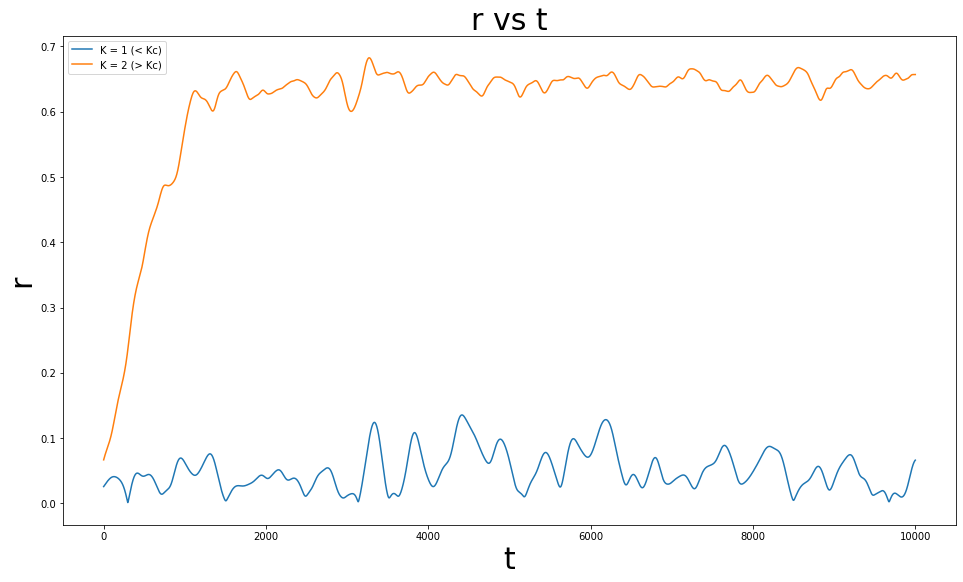

In [3]:
X = np.array(range(n))

plt.figure(figsize=[16,9])

plt.plot(X, R[0])
plt.plot(X, R[1])
plt.legend(['K = 1 (< Kc)', 'K = 2 (> Kc)'])
plt.title("r vs t",fontsize=30)
plt.xlabel('t',fontsize = 30)
plt.ylabel('r',fontsize = 30)

plt.show()